In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/mouse_metadata.csv"
study_results_path = "data/Study_results.csv"


# Read the mouse data and the study results

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
newdf = pd.merge(mouse_metadata,study_results,how = 'inner' , on = 'Mouse ID')
# Display the data table for preview
newdf.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
newdf["Mouse ID"].nunique()

249

In [33]:

clean_newdf = newdf[newdf['Mouse ID'].isin(drop_dup_mouse_id)==False] 
clean_mouse_df = mouse_metadata[mouse_metadata['Mouse ID'].isin(drop_dup_mouse_id)==False]
clean_newdf

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#find duplicate mice 
drop_dup_mouse_id = newdf.loc[newdf.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
drop_dup_mouse_id

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_uid = list(drop_dup_mouse_id)
dup_mouse_uid =  newdf[newdf['Mouse ID']=='g989']
dup_mouse_uid

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = newdf[newdf['Mouse ID'] != 'g989']

In [10]:
# Checking the number of mice in the clean DataFrame.
clean_df[clean_df['Mouse ID']=='g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


## Summary Statistics

In [34]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_group_stats = clean_newdf.groupby('Drug Regimen').agg(Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean),
                                                     Tumor_Vol_Median=('Tumor Volume (mm3)', np.median),
                                                     Tumor_Vol_Var=('Tumor Volume (mm3)', np.var),
                                                     Tumor_Vol_Stdev=('Tumor Volume (mm3)', np.std),
                                                     Tumor_Vol_SEM=('Tumor Volume (mm3)', st.sem)).round(3)
drug_group_stats

,Tumor_Vol_Mean,Tumor_Vol_Median,Tumor_Vol_Var,Tumor_Vol_Stdev,Tumor_Vol_SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar and Pie Charts

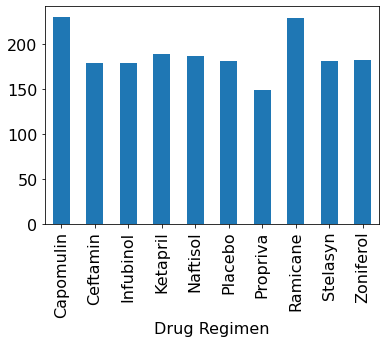

In [90]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
drug_group = clean_newdf.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
drug_group_count = pd.DataFrame(drug_group)

drug_group_count.plot.bar(legend = False, rot= 90)

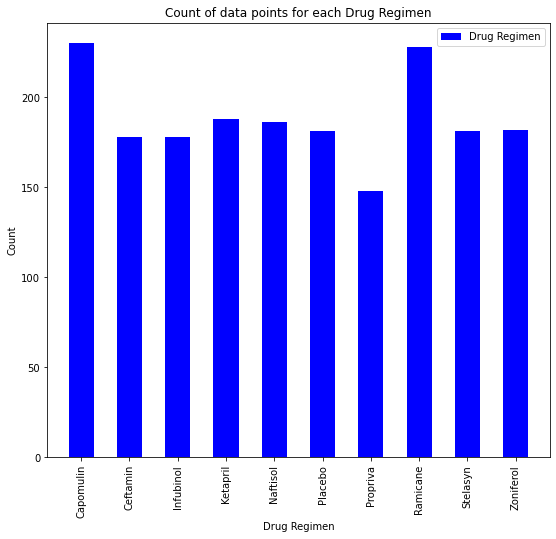

In [36]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
drug_group = clean_newdf.groupby('Drug Regimen')# Create a dataframe counting the number of data points for each Drug Regimen
drug_group_count = pd.DataFrame(drug_group['Drug Regimen'].count())
x_axis = np.arange(len(drug_group_count))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(9,8))
plt.bar(x_axis, drug_group_count["Drug Regimen"], color='blue', align="center", width = 0.52)
plt.xticks(tick_locations, list(drug_group_count.index), rotation="vertical")
plt.xlim(-0.7, len(x_axis)-0.3)
plt.ylim(0, max(drug_group_count["Drug Regimen"])*1.05)
plt.title("Count of data points for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")
column_name = ["Drug Regimen"]
plt.legend(column_name,loc="best")


In [88]:
gender=gender_counts.values

NameError: name 'gender_counts' is not defined

In [42]:
gender = pd.DataFrame(clean_newdf.groupby('Sex').count()['Mouse ID'])
gender

,Mouse ID
Sex,
Female,922
Male,958


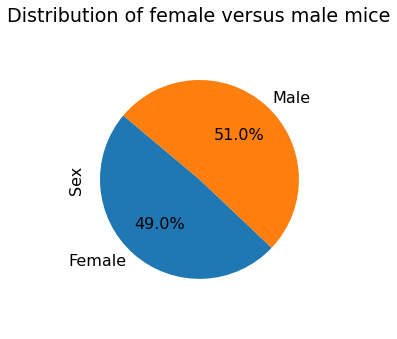

In [83]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

secondpie = gender["Mouse_ID"].plot.pie(y='sizes', labels  = gender.Sex, figsize=(5, 5), autopct="%1.1f%%",startangle=140)
plt.title('Male vs Female Mouse Population')
plt.rcParams['font.size'] = 16
plt.title("Distribution of female versus male mice")
plt.ylabel("Sex")
plt.tight_layout()
plt.axis("equal")

plt.show()     

Text(0, 0.5, 'Sex')

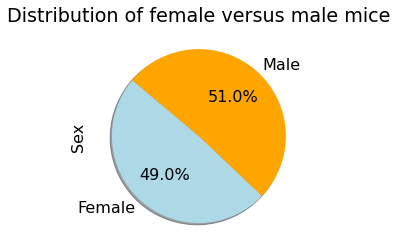

In [71]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender = pd.DataFrame(clean_newdf.groupby('Sex').count().reset_index())
gender = gender[['Sex','Mouse ID']]
gender.columns = ['Sex','Mouse_ID']
colors = ["lightblue", "orange"]
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(gender.Mouse_ID,labels=gender.Sex,colors=colors,autopct ='%1.1f%%',
        shadow=True,  startangle= 140)
plt.rcParams['font.size'] = 16
plt.title("Distribution of female versus male mice")
plt.ylabel("Sex")
 

## Quartiles, Outliers and Boxplots

In [72]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

cap_df = clean_newdf.loc[clean_newdf["Drug Regimen"] == "Capomulin",:]
ram_df = clean_newdf.loc[clean_newdf["Drug Regimen"] == "Ramicane", :]
inf_df = clean_newdf.loc[clean_newdf["Drug Regimen"] == "Infubinol", :]
ceft_df = clean_newdf.loc[clean_newdf["Drug Regimen"] == "Ceftamin", :]
cap_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [76]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
best4 = clean_df[clean_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
best4 = best4.sort_values(["Timepoint"], ascending=True)
best4

best4_data = best4[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

best4_data
tumors = clean_df["Tumor Volume (mm3)"]

quartiles = tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

#Capomulin
caplast = cap_df.groupby('Mouse ID').max()['Timepoint']
caplastvol = pd.DataFrame(caplast)
caplastmerge = pd.merge(caplastvol, clean_df, on=("Mouse ID","Timepoint"),how="left")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Capomulin potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")

#Ramicane
ramlast = ram_df.groupby('Mouse ID').max()['Timepoint']
ramlastvol = pd.DataFrame(ramlast)
ramlastmerge = pd.merge(ramlastvol, clean_df, on=("Mouse ID","Timepoint"),how="left")
tumors2 = ramlastmerge["Tumor Volume (mm3)"]
quartiles2 = tumors2.quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2

lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)
print(f"Ramicane potential outliers could be values below {lower_bound2} and above {upper_bound2} could be outliers.")

#Infubinol
inflast = inf_df.groupby('Mouse ID').max()['Timepoint']
inflastvol = pd.DataFrame(inflast)
inflastmerge = pd.merge(inflastvol, clean_df, on=("Mouse ID","Timepoint"),how="left")
tumors3 = inflastmerge["Tumor Volume (mm3)"]
quartiles3 = tumors3.quantile([.25,.5,.75])
lowerq3 = quartiles3[0.25]
upperq3 = quartiles3[0.75]
iqr3 = upperq3-lowerq3

lower_bound3 = lowerq3 - (1.5*iqr3)
upper_bound3 = upperq3 + (1.5*iqr3)
print(f"Infubinol potential outliers could be values below {lower_bound3} and above {upper_bound3} could be outliers.")

#Ceftamin
ceftlast = ceft_df.groupby('Mouse ID').max()['Timepoint']
ceftlastvol = pd.DataFrame(ceftlast)
ceftlastmerge = pd.merge(ceftlastvol, clean_df, on=("Mouse ID","Timepoint"),how="left")
tumors4 = ceftlastmerge["Tumor Volume (mm3)"]
quartiles4 = tumors4.quantile([.25,.5,.75])
lowerq4 = quartiles4[0.25]
upperq4 = quartiles4[0.75]
iqr4 = upperq4-lowerq4

lower_bound4 = lowerq4 - (1.5*iqr4)
upper_bound4 = upperq4 + (1.5*iqr4)
print(f"Ceftamin potential outliers could be values below {lower_bound4} and above {upper_bound4} could be outliers.")

The lower quartile of temperatures is: 45.0
The upper quartile of temperatures is: 56.32407510749999
The interquartile range of temperatures is: 11.324075107499993
The the median of temperatures is: 48.933453655 
Capomulin potential outliers could be values below 28.01388733875001 and above 73.31018776874998 could be outliers.
Ramicane potential outliers could be values below 17.912664470000003 and above 54.30681135 could be outliers.
Infubinol potential outliers could be values below 36.83290494999999 and above 82.74144559000001 could be outliers.
Ceftamin potential outliers could be values below 25.355449580000002 and above 87.66645829999999 could be outliers.


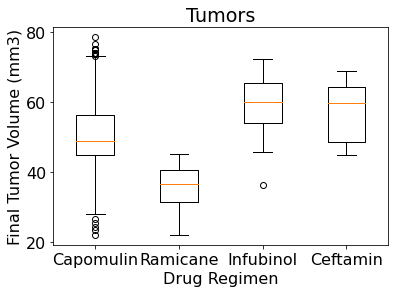

In [77]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_to_plot = [tumors, tumors2, tumors3, tumors4]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(data_to_plot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])

plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

In [51]:
cap_df['Mouse ID'].unique()

array(['s185', 'x401', 'm601', 'f966', 'u364', 'y793', 'r554', 'm957',
       't565', 'i738', 'w914', 'g288', 'l897', 'b742', 'b128', 'j246',
       'j119', 'w150', 'v923', 'g316', 's710', 'l509', 'r944', 'i557',
       'r157'], dtype=object)

C:\Users\Man-y\anaconda3\lib\site-packages\numpy\core\_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Man-y\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


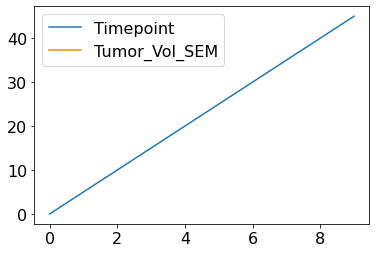

In [52]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_data = cap_df.loc[newdf['Mouse ID'] == 'l509']
cap_time_tumor = capomulin_data.groupby(['Timepoint']).agg(
        # Get the mean of the 'Tumor Volume (mm3)' column
        Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean),
        # Get the standard error of measurement (SEM) of the 'Tumor Volume (mm3)' column
        Tumor_Vol_SEM=('Tumor Volume (mm3)', st.sem)).round(3)
# View the groupby dataframe
cap_time_tumor = pd.DataFrame(cap_time_tumor).reset_index()
time_vs_tumor_data = cap_time_tumor[['Timepoint', 'Tumor_Vol_SEM']]
time_vs_tumor_data.plot.line()

In [82]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_data = clean_newdf.loc[newdf['Drug Regimen'] == 'Capomulin']

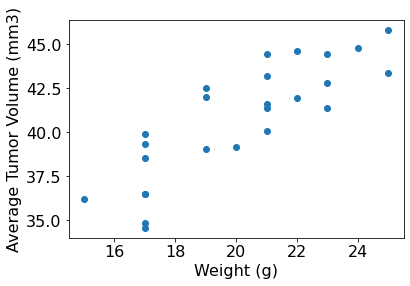

In [54]:
capmean = cap_df.groupby(['Mouse ID']).mean()
plt.scatter(capmean['Weight (g)'],capmean['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [79]:
# Calculate the correlation coefficient and linear regression model 
 #for mouse weight and average tumor volume for the Capomulin regimen


In [55]:
corr=round(st.pearsonr(capmean['Weight (g)'],capmean['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.84


In [56]:
model=st.linregress(capmean['Weight (g)'],capmean['Tumor Volume (mm3)'])
model

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

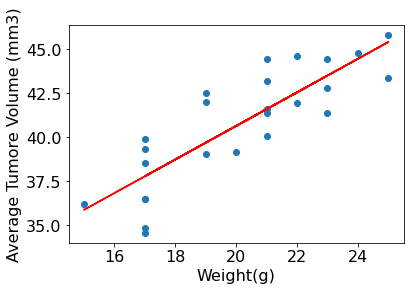

In [57]:
mslope = 0.9544396890241045
bintercept = 21.552160532685015
y_values = capmean['Weight (g)']*mslope+bintercept
plt.scatter(capmean['Weight (g)'],capmean['Tumor Volume (mm3)'])
plt.plot(capmean['Weight (g)'],y_values,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
plt.show()

In [ ]:
#PLEASE SEE ANALYSIS IN THE README